### Model features
- augmentation (6 image generated)
- 2 dropout layer
- adam optimizer with learning rate decay

In [26]:
NAME = 'lr-2dropout-augmentation'
LOAD = False

In [4]:
import sys
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2
import random
from tqdm import tqdm
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import keras
from keras import optimizers
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense, Dropout, Flatten, BatchNormalization

# import third-party library
sys.path.append('./my_lib/')
from data_augmentation import DataAugmentation

c:\users\luca\anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [5]:
# import data
csv_train = pd.read_csv('../input/labels.csv')
csv_test = pd.read_csv('../input/sample_submission.csv')

In [6]:
# read training CSV
csv_train.head(10)

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever
5,002211c81b498ef88e1b40b9abf84e1d,bedlington_terrier
6,00290d3e1fdd27226ba27a8ce248ce85,bedlington_terrier
7,002a283a315af96eaea0e28e7163b21b,borzoi
8,003df8b8a8b05244b1d920bb6cf451f9,basenji
9,0042188c895a2f14ef64a918ed9c7b64,scottish_deerhound


In [7]:
# read test csv
csv_test.head(10)

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,000621fb3cbb32d8935728e48679680e,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
1,00102ee9d8eb90812350685311fe5890,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
2,0012a730dfa437f5f3613fb75efcd4ce,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
3,001510bc8570bbeee98c8d80c8a95ec1,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
4,001a5f3114548acdefa3d4da05474c2e,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
5,00225dcd3e4d2410dd53239f95c0352f,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
6,002c2a3117c2193b4d26400ce431eebd,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
7,002c58d413a521ae8d1a5daeb35fc803,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
8,002f80396f1e3db687c5932d7978b196,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
9,0036c6bcec6031be9e62a257b1c3c442,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333


In [8]:
# reduce dataset for test
# csv_train = csv_train.head(200)
# csv_test = csv_test.head(200)

In [9]:
# Generate Labels
targets_series = pd.Series(csv_train['breed'])
# print(targets_series)
one_hot = pd.get_dummies(targets_series, sparse = True)
labels = np.asarray(one_hot)
n_check = random.randint(0, len(labels)-1)
print(csv_train['breed'][n_check], 'is encoded as', ''.join((str(i) for i in labels[n_check])))

saluki is encoded as 000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000100000000000000000000000000


In [10]:
im_size = 90

x_train = []
y_train = []
x_test = []

In [11]:
for i, (f, breed) in enumerate(tqdm(csv_train.values)):
    img = cv2.imread('../input/train/{}.jpg'.format(f))
    x_train.append(cv2.resize(img, (im_size, im_size)))
    y_train.append(labels[i])

100%|███████████████████████████████████████████████████████████████████████████| 10222/10222 [00:37<00:00, 274.83it/s]


Use external module to execute data augmentation.
The module execute:
- [ ] Inversion
- [ ] Sobel derivative
- [ ] Scharr derivative
- [ ] Laplacian <!--**(error not used for now)**-->
- [ ] Blur
- [ ] Gaussian blur [disable]
- [ ] Median blur
- [ ] Bilateral blur
- [x] Horizontal flips
- [x] Rotation

  0%|                                                                                        | 0/10222 [00:00<?, ?it/s]

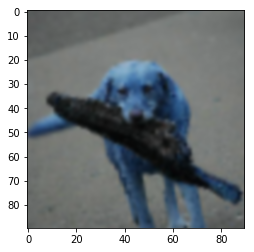

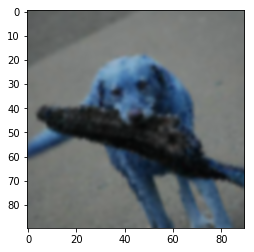

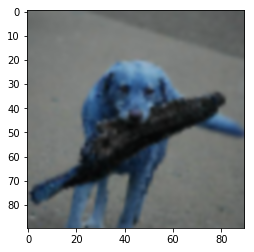

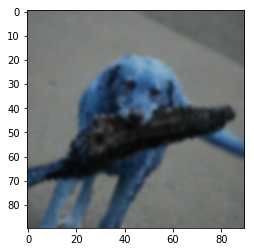

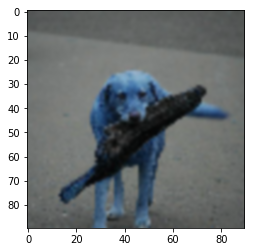

100%|██████████████████████████████████████████████████████████████████████████| 10222/10222 [00:03<00:00, 3379.13it/s]


dataset became: 61332


In [12]:
for i, images in enumerate(tqdm(DataAugmentation(x_train,
                                                 options={'inverse': False,
                                                          'sobel_derivative': False,
                                                          'scharr_derivative': False,
                                                          'laplacian': False,
                                                          'blur': False,
                                                          'gaussian_blur': False,
                                                          'median_blur': False,
                                                          'bilateral_blur': False,
                                                          'horizontal_flips': True,
                                                          'rotation': True,
                                                          # 'rotation_config': [(10,1.2)],
                                                          'shuffle_result': False}))):
    for image in images:
        if i == 4:
            plt.imshow(image, cmap = 'gray', interpolation = 'bicubic')
            plt.show()
        x_train.append(image)
        y_train.append(y_train[i])
    
print('dataset became:', len(x_train))

label: 000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000010000000000000000000000000


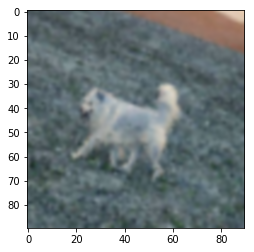

In [13]:
# check train
n_check = random.randint(0, len(y_train)-1)
print('label:', ''.join((str(i) for i in y_train[n_check])))
plt.imshow(x_train[n_check], cmap = 'gray', interpolation = 'bicubic')
plt.show()

In [14]:
for f in tqdm(csv_test['id'].values):
    img = cv2.imread('../input/test/{}.jpg'.format(f))
    x_test.append(cv2.resize(img, (im_size, im_size)))

100%|███████████████████████████████████████████████████████████████████████████| 10357/10357 [00:37<00:00, 279.77it/s]


In [15]:
# build np array and normalise them
x_train_raw = np.array(x_train, np.float32) / 255.
y_train_raw = np.array(y_train, np.uint8)
x_test_raw  = np.array(x_test, np.float32) / 255.

In [16]:
print("x_train shape:", x_train_raw.shape)
print("y_train shape:", y_train_raw.shape)
print("x_test shape:", x_test_raw.shape)

x_train shape: (61332, 90, 90, 3)
y_train shape: (61332, 120)
x_test shape: (10357, 90, 90, 3)


In [17]:
num_classes = y_train_raw.shape[1]
classes = csv_test.columns.values[1:]

Using the __stratify__ parameter on __treain_test_split__ the split should be equally distributed per classes.

**TODO:** Add cross validation 

In [18]:
X_train, X_valid, Y_train, Y_valid = train_test_split(x_train_raw, y_train_raw,
                                                      test_size=0.20, random_state=42,
                                                      stratify=y_train_raw)

**TODO:** try the optimizer _rmsprop_ instead of _adam_.

In [42]:
# Create the base pre-trained model
base_model = VGG16(weights="imagenet", include_top=False, input_shape=(im_size, im_size, 3))

# Add a new top layers
x = base_model.output
x = Flatten()(x)
x = Dense(4096, activation='relu')(x)
x = Dropout(0.35)(x)
x = Dense(4096, activation='relu')(x)
x = Dropout(0.35)(x)
x = BatchNormalization()(x)
predictions = Dense(num_classes, activation='softmax')(x)

# This is the model we will train
model = Model(inputs=base_model.input, outputs=predictions)

# First: train only the top layers (which were randomly initialized)
for layer in base_model.layers:
    layer.trainable = False
    
optimizer = optimizers.Adam(lr=0.003, beta_1=0.9, beta_2=0.999, epsilon=None, decay=1e-6, amsgrad=False)

model.compile(loss='categorical_crossentropy', 
              optimizer=optimizer,
              metrics=['accuracy'])

callbacks_list = [
    keras.callbacks.ModelCheckpoint('../output/weights.' + NAME + '.{epoch:02d}-{val_loss:.2f}.hdf5',
                                    monitor='val_loss', verbose=0, save_best_only=True, save_weights_only=True,
                                    mode='auto', period=1),
    keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, verbose=1)]
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 90, 90, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 90, 90, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 90, 90, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 45, 45, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 45, 45, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 45, 45, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 22, 22, 128)       0         
__________

In [43]:
# load previous backuped weigths
if LOAD:
    model.load_weights('../output/weights.lr-2dropout-augmentation.01-5.79.hdf5')

In [3]:
history = model.fit(X_train, Y_train, epochs=40, batch_size=48, 
                    validation_data=(X_valid, Y_valid), 
                    callbacks=callbacks_list, verbose=1)

NameError: name 'model' is not defined

In [22]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

NameError: name 'history' is not defined

In [44]:
preds = model.predict(x_test_raw, verbose=1)

10357/10357 [==============================] - 14s 1ms/step


In [45]:
# save prediction to csv
frame = pd.DataFrame(preds, index=csv_test['id'].tolist(), columns=classes)
frame.to_csv("../output/predicted-{}.csv".format(NAME), index_label='id') 

In [46]:
frame.head(10)

,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,beagle,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
000621fb3cbb32d8935728e48679680e,8.710048e-07,0.006425,0.000006,0.001879,0.035982,0.001324,0.000017,1.510272e-04,0.004883,0.025921,...,0.000011,0.000025,1.596969e-04,0.062231,0.020350,0.092532,0.000006,0.002045,0.002513,0.000010
00102ee9d8eb90812350685311fe5890,9.180199e-06,0.000085,0.000004,0.000124,0.005648,0.000326,0.000004,2.036967e-05,0.000048,0.000036,...,0.000002,0.002049,8.184696e-07,0.000331,0.004201,0.000103,0.002080,0.001493,0.004998,0.000002
0012a730dfa437f5f3613fb75efcd4ce,2.213719e-03,0.011843,0.000769,0.025964,0.013378,0.008510,0.000194,1.571138e-04,0.001659,0.000784,...,0.000093,0.000482,4.732533e-04,0.003400,0.148048,0.002289,0.000489,0.007754,0.001460,0.000529
001510bc8570bbeee98c8d80c8a95ec1,5.229767e-04,0.004524,0.000286,0.055531,0.013949,0.003140,0.000116,8.132621e-05,0.000596,0.000125,...,0.000014,0.000270,1.692459e-04,0.000539,0.230285,0.000263,0.000064,0.002203,0.000437,0.000323
001a5f3114548acdefa3d4da05474c2e,1.854233e-03,0.012185,0.000083,0.013173,0.010670,0.001337,0.000037,1.770030e-06,0.000166,0.000019,...,0.000030,0.000032,1.844435e-05,0.000117,0.431004,0.000172,0.000103,0.000993,0.000807,0.000167
00225dcd3e4d2410dd53239f95c0352f,6.269080e-04,0.080563,0.000299,0.060913,0.044602,0.002135,0.000764,2.309693e-03,0.005291,0.013057,...,0.003649,0.000065,3.244443e-03,0.020375,0.045563,0.019322,0.000317,0.008607,0.012051,0.001297
002c2a3117c2193b4d26400ce431eebd,4.746983e-03,0.000517,0.000218,0.021997,0.004206,0.004479,0.000551,7.083163e-05,0.000332,0.000041,...,0.000010,0.000608,7.914457e-05,0.000066,0.025751,0.000182,0.000146,0.000331,0.000206,0.000944
002c58d413a521ae8d1a5daeb35fc803,2.201654e-05,0.000009,0.000005,0.000118,0.002455,0.000041,0.002883,5.567942e-04,0.000008,0.000113,...,0.000026,0.000442,2.799071e-07,0.000031,0.000012,0.000321,0.100838,0.000150,0.025981,0.000054
002f80396f1e3db687c5932d7978b196,3.356585e-04,0.006389,0.001476,0.027216,0.009928,0.007370,0.000118,4.685176e-05,0.000268,0.000176,...,0.000010,0.000221,1.000317e-04,0.002261,0.181167,0.001102,0.000132,0.007401,0.000478,0.000119
0036c6bcec6031be9e62a257b1c3c442,6.916114e-05,0.003090,0.000031,0.092695,0.031492,0.001068,0.000059,7.379351e-07,0.000292,0.000336,...,0.000117,0.000003,2.727267e-04,0.000178,0.528209,0.000419,0.000003,0.000111,0.000203,0.000269


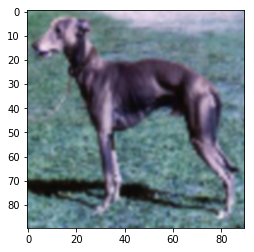

0.4018807 114 weimaraner


In [47]:
# check predict
n_check = random.randint(0, len(x_test_raw)-1)
plt.imshow(x_test_raw[n_check], cmap = 'gray_r', interpolation = 'bicubic')
plt.show()
pre = model.predict(np.array([x_test_raw[n_check]]))
arg_max = np.argmax(pre)
print(np.max(pre), arg_max, classes[arg_max])